<h1 align="center">Machine Learning and Vision Lab</h1>
<h4 align="center">Dr. Mohammadzadeh</h4>
<h4 align="center">Sharif University of Technology, Fall 2023</h4>
<h4 align="center">Amir Hossein Yari - 99102507</h4>
<h4 align="center">Lab 1 - PCA</h4>

<h3 align="left">EigenFace</h3>

In [87]:
# Import required packages
import cv2
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [88]:
# Function to convert images to grayscale and save them in a list
def convert_to_gray_and_save(input_folder):
    gray_images = []

    # Read and convert images to grayscale, then add them to the list
    for filename in os.listdir(input_folder):
        if filename.endswith(".png"):
            img_path = os.path.join(input_folder, filename)
            # Read the image in BGR format
            img = cv2.imread(img_path)
            # Convert BGR to grayscale
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            # Add the grayscale image to the list
            gray_images.append(gray_img)

    return gray_images

# Call the function for the "neutral"
neutral_images = convert_to_gray_and_save("neutral")

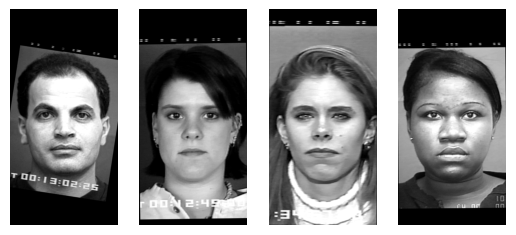

In [89]:
# Function to show random images from the list
def show_random_images(image_list, num_images):
    random_indices = random.sample(range(len(image_list)), num_images)
    for i, index in enumerate(random_indices):
        img = image_list[index]
        plt.subplot(1, num_images, i+1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    plt.show()

# Call the function to show random images
show_random_images(neutral_images, 4)

In [90]:
vector_list = []
for img in neutral_images:
    # Flatten the image to a 1D vector
    vector = img.flatten()
    vector_list.append(vector)

In [91]:
## Split train and test not randomly
# Number of training data
num_training_data = 70

# Split the data into training and testing sets
training_images = []
testing_images = []

for i in range(len(neutral_images)):
    if i // 2 < num_training_data:
        training_images.append(neutral_images[i])
    else:
        testing_images.append(neutral_images[i])

# Flatten the training image to a 1D vector
training_images_vector = []
for img in training_images:
    vector = img.flatten()
    training_images_vector.append(vector)

# Flatten the testing image to a 1D vector
testing_images_vector = []
for img in testing_images:
    vector = img.flatten()
    testing_images_vector.append(vector)

In [92]:
## Split train and test randomly
random_numbers = []
# Loop until the list has 70 numbers
while len(random_numbers) <= 70:
    # Generate a random number between 1 and 95
    num = random.randint(1, 95)
    # Check if the number is even
    if num % 2 == 1:
        # Add the number to the list
        random_numbers.append(num)
        random_numbers.append(num+1)

# Split the data into training and testing sets
training_images = []
testing_images = []

for i in range(190):
    if i in random_numbers:
        training_images.append(neutral_images[i])
    else:
        testing_images.append(neutral_images[i])

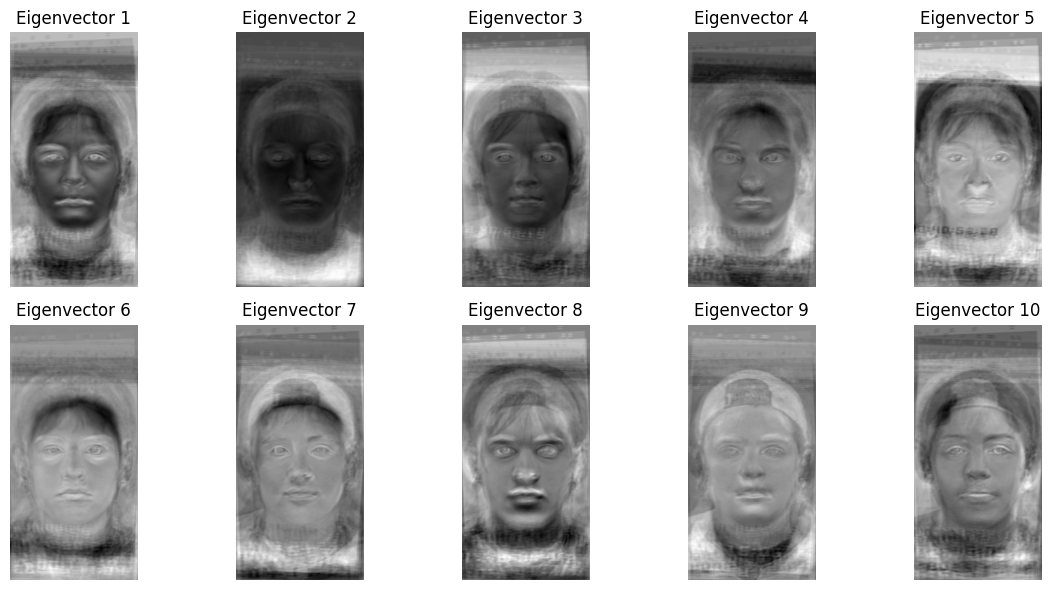

In [93]:
# calculate mean
mean_vector = np.mean(training_images_vector, axis=0) # 180000 * 1

# Center the data by subtracting the mean from each vector
centered_data = (training_images_vector - mean_vector).T # 180000 * 140

# Perform eigendecomposition on the covariance matrix
eigenvalues, eigenvectors = np.linalg.eigh(centered_data.T @ centered_data)

pca = PCA(n_components=10)
pca.fit(training_images_vector)
eigen_vectors = pca.components_

# Create a figure with a 2x5 grid of subplots (10 subplots in total)
fig, axes = plt.subplots(2, 5, figsize=(12, 6))

# Display the top 10 eigenimages using subplots
for i in range(10):
    # Determine the row and column for the current subplot
    row = i // 5
    col = i % 5
    
    # Display eigenimage in the current subplot
    axes[row, col].imshow(eigen_vectors[i, :].reshape(600, 300), cmap='gray')
    axes[row, col].set_title(f'Eigenvector {i+1}')
    axes[row, col].axis('off')

# Adjust subplot spacing
plt.tight_layout()

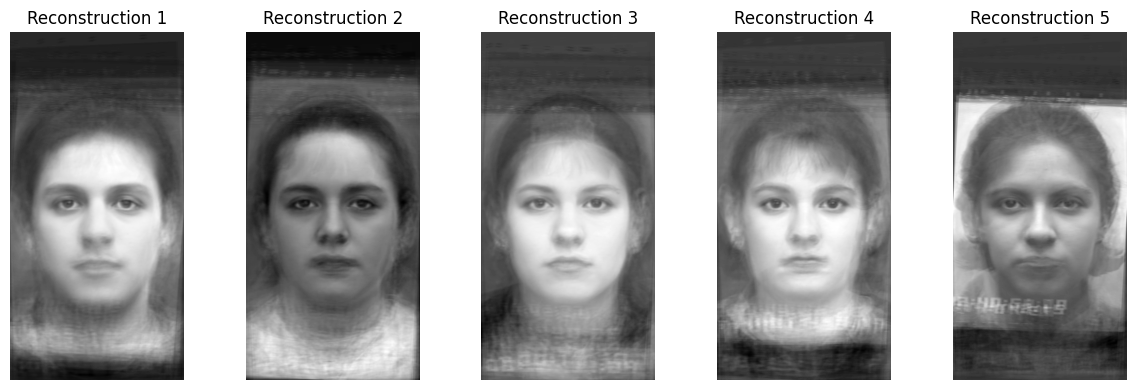

In [94]:
# Calculate mean of images
mean_vector = np.mean(training_images_vector, axis=0)

# Centerise data
centered_data = training_images_vector - mean_vector

# Calculate eigenvalues and eigenvectors


# Choose 5 images from training set and convert to np.array
random_indices = random.sample(range(len(training_images_vector)), 5)
random_images = []
for index in random_indices:
    img = (training_images_vector[index] - mean_vector) / np.linalg.norm(mean_vector, ord=2)
    random_images.append(img)
random_images_matrix = np.matrix(random_images) # 5*180000

# Apply PCA on 5 images
pca_image = random_images_matrix.dot(eigen_vectors.T) # 5*10

# Reconstruct image
reconstruct_image = pca_image.dot(eigen_vectors) + mean_vector / np.linalg.norm(mean_vector, ord=2)# 5*180000

# Resahpe reconstruction vector to image(2D)
recon_images = []
for i in range(5):
    recon_vector = reconstruct_image[i, :]
    recon_image = recon_vector.reshape(600, 300)
    recon_images.append(recon_image)

# Create a figure with a 1x5 grid of subplots (5 subplots in total)
fig, axes = plt.subplots(1, 5, figsize=(12, 4))

# Display the top 5 reconstruction images using subplots
for i in range(5):
    # Convert reconstruction image to the correct range (0-255)
    recon_image = recon_images[i]
    recon_image = cv2.normalize(recon_image, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    
    # Display reconstruction image in the current subplot
    axes[i].imshow(recon_image, cmap='gray')
    axes[i].set_title(f'Reconstruction {i+1}')
    axes[i].axis('off')

# Adjust subplot spacing
plt.tight_layout()

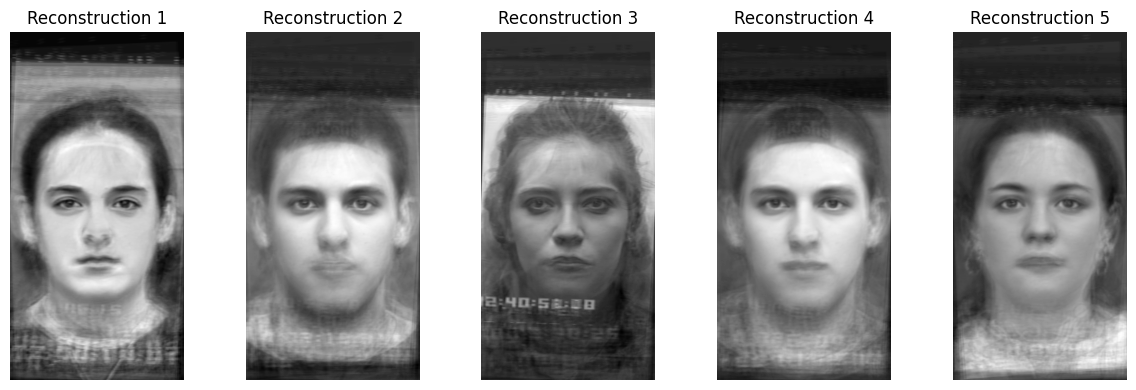

In [96]:
pca = PCA(n_components=20)
pca.fit(training_images_vector)
eigen_vectors = pca.components_

# Choose 5 images from training set and convert to np.array
random_indices = random.sample(range(len(training_images_vector)), 5)
random_images = []
for index in random_indices:
    img = (training_images_vector[index] - mean_vector) / np.linalg.norm(mean_vector, ord=2)
    random_images.append(img)
random_images_matrix = np.matrix(random_images) # 5*180000

# Apply PCA on 5 images
pca_image = random_images_matrix.dot(eigen_vectors.T) # 5*20

# Reconstruct image
reconstruct_image = pca_image.dot(eigen_vectors) + mean_vector/ np.linalg.norm(mean_vector, ord=2) # 5*180000

# Resahpe reconstruction vector to image(2D)
recon_images = []
for i in range(5):
    recon_vector = reconstruct_image[i, :]
    recon_image = recon_vector.reshape(600, 300)
    recon_images.append(recon_image)

# Create a figure with a 1x5 grid of subplots (5 subplots in total)
fig, axes = plt.subplots(1, 5, figsize=(12, 4))

# Display the top 5 reconstruction images using subplots
for i in range(5):
    # Convert reconstruction image to the correct range (0-255)
    recon_image = recon_images[i]
    recon_image = cv2.normalize(recon_image, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    
    # Display reconstruction image in the current subplot
    axes[i].imshow(recon_image, cmap='gray')
    axes[i].set_title(f'Reconstruction {i+1}')
    axes[i].axis('off')

# Adjust subplot spacing
plt.tight_layout()

<span style="color: green;">
Generally, images reconstructed with more components (in this case, 20) will have better quality and more detail compared to those reconstructed with fewer components (10).<br>
Images reconstructed with 20 components should have a lower MSE compared to those with 10 components.<br>
As you see, faces will be more similar to the original face and different from others with 20 components.
</span>

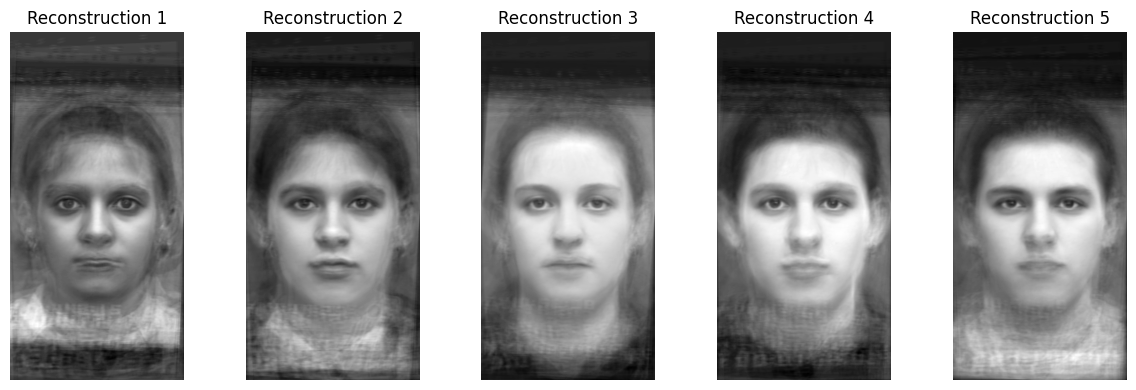

In [99]:
pca = PCA(n_components=20)
pca.fit(training_images_vector)
eigen_vectors = pca.components_

# Choose 5 images from training set and convert to np.array
random_indices = random.sample(range(len(testing_images_vector)), 5)
random_images = []
for index in random_indices:
    img = (testing_images_vector[index] - mean_vector)/ np.linalg.norm(mean_vector, ord=2)
    random_images.append(img)
random_images_matrix = np.matrix(random_images) # 5*180000

# Apply PCA on 5 images
pca_image = random_images_matrix.dot(eigen_vectors.T) # 5*20

# Reconstruct image
reconstruct_image = pca_image.dot(eigen_vectors) + mean_vector/ np.linalg.norm(mean_vector, ord=2) # 5*180000

# Resahpe reconstruction vector to image(2D)
recon_images = []
for i in range(5):
    recon_vector = reconstruct_image[i, :]
    recon_image = recon_vector.reshape(600, 300)
    recon_images.append(recon_image)

# Create a figure with a 1x5 grid of subplots (5 subplots in total)
fig, axes = plt.subplots(1, 5, figsize=(12, 4))

# Display the top 5 reconstruction images using subplots
for i in range(5):
    # Convert reconstruction image to the correct range (0-255)
    recon_image = recon_images[i]
    recon_image = cv2.normalize(recon_image, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    
    # Display reconstruction image in the current subplot
    axes[i].imshow(recon_image, cmap='gray')
    axes[i].set_title(f'Reconstruction {i+1}')
    axes[i].axis('off')

# Adjust subplot spacing
plt.tight_layout()

<span style="color: green;">
The quality of reconstruction for test images depends on the same principal components and coefficients. However, test images might not be as well represented as training images if they significantly differ from the distribution of the training data.<br>
Test images might have higher reconstruction error compared to training images, especially if they contain patterns or variations that were not well represented in the training data.
</span>

<h3 align="left">Filling Subspaces</h3>

In [100]:
def preprocess_image(image_path):
    # Read the image
    image = cv2.imread(image_path)
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray

def load_emotion_images(emotion_path):
    images = []
    # Loop through the files in the emotion directory
    for filename in os.listdir(emotion_path):
        if filename.endswith(".png"):
            image_path = os.path.join(emotion_path, filename)
            preprocessed_image = preprocess_image(image_path)
            images.append(preprocessed_image)
    return images

# Read emotions images
disgust_images = load_emotion_images("disgust")
happy_images = load_emotion_images("happy")
neutral_images = load_emotion_images("neutral")
surprise_images = load_emotion_images("surprise")

# Function to detect faces in a set of images
def detect_faces_in_images(image_set):
    detected_faces = []
    # Iterate through the images in the set
    for image in image_set:
        face = image[150:480, 50:250]
        # Store the detected faces in the list
        detected_faces.append(face)

    return detected_faces

# Detect faces in each set of images
disgust_detected_faces = detect_faces_in_images(disgust_images)
happy_detected_faces = detect_faces_in_images(happy_images)
neutral_detected_faces = detect_faces_in_images(neutral_images)
surprise_detected_faces = detect_faces_in_images(surprise_images)

# Flatten emotions images
disgust_images_vector = []
for img in disgust_detected_faces:
    vector = img.flatten()
    disgust_images_vector.append(vector)

happy_images_vector = []
for img in happy_detected_faces:
    vector = img.flatten()
    happy_images_vector.append(vector)

neutral_images_vector = []
for img in neutral_detected_faces:
    vector = img.flatten()
    neutral_images_vector.append(vector)

surprise_images_vector = []
for img in surprise_detected_faces:
    vector = img.flatten()
    surprise_images_vector.append(vector)

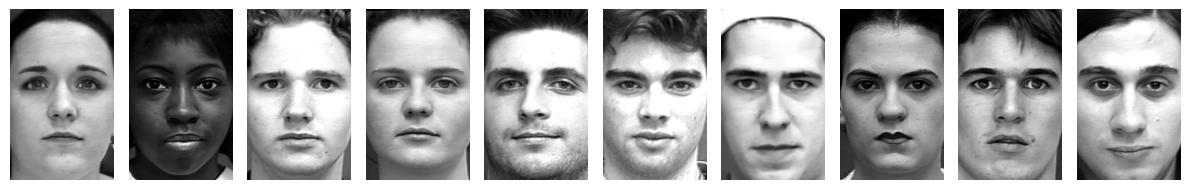

In [101]:
# Choose 10 images from neutral faces and convert to np.array
random_indices = random.sample(range(len(neutral_detected_faces)), 10)
random_images = []
flatten_random_image = []
for index in random_indices:
    img = neutral_detected_faces[index]
    random_images.append(img)
    vector = (img.flatten() - np.mean(happy_images_vector, axis=0))/ np.linalg.norm(np.mean(happy_images_vector, axis=0), ord=2)
    flatten_random_image.append(vector)

# Create a figure with a 2x5 grid of subplots (5 subplots in total)
fig, axes = plt.subplots(1, 10, figsize=(12, 4))

# Display the top 10 reconstruction images using subplots
for i in range(10):
    # Convert reconstruction image to the correct range (0-255)
    random_image = random_images[i]
    random_image = cv2.normalize(random_image, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

    # Display reconstruction image in the current subplot
    axes[i].imshow(random_image, cmap='gray')
    axes[i].axis('off')

# Adjust subplot spacing
plt.tight_layout()

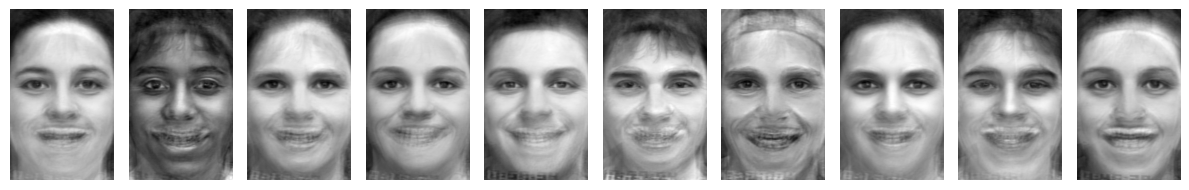

In [105]:
# Reconstruct in happy mode
# calculate mean
mean_vector_happy = np.mean(happy_images_vector, axis=0)

pca = PCA(n_components=20)
pca.fit(happy_images_vector)
eigen_vectors = pca.components_

# Apply PCA on 5 images
pca_image = np.matrix(flatten_random_image).dot(eigen_vectors.T)

# Reconstruct image
reconstruct_image = pca_image.dot(eigen_vectors) + mean_vector_happy / np.linalg.norm(np.mean(happy_images_vector, axis=0), ord=2)

# Resahpe reconstruction vector to image(2D)
recon_images = []
for i in range(10):
    recon_vector = reconstruct_image[i, :]
    recon_image = recon_vector.reshape(330, 200)
    recon_images.append(recon_image)

# Create a figure with a 1x10 grid of subplots (10 subplots in total)
fig, axes = plt.subplots(1, 10, figsize=(12, 4))

# Display the top 10 reconstruction images using subplots
for i in range(10):
    # Convert reconstruction image to the correct range (0-255)
    recon_image = recon_images[i]
    recon_image = cv2.normalize(recon_image, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

    # Display reconstruction image in the current subplot
    axes[i].imshow(recon_image, cmap='gray')
    axes[i].axis('off')

# Adjust subplot spacing
plt.tight_layout()

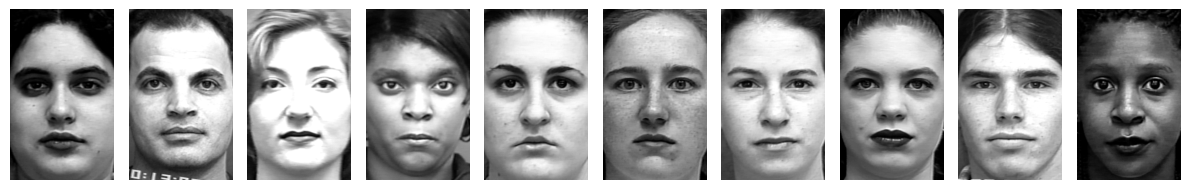

In [106]:
# Choose 10 images from neutral faces and convert to np.array
random_indices = random.sample(range(len(neutral_detected_faces)), 10)
random_images = []
flatten_random_image = []
for index in random_indices:
    img = neutral_detected_faces[index]
    random_images.append(img)
    vector = (img.flatten() - np.mean(disgust_images_vector, axis=0))/ np.linalg.norm(np.mean(disgust_images_vector, axis=0), ord=2)
    flatten_random_image.append(vector)

# Create a figure with a 2x5 grid of subplots (5 subplots in total)
fig, axes = plt.subplots(1, 10, figsize=(12, 4))

# Display the top 10 reconstruction images using subplots
for i in range(10):
    # Convert reconstruction image to the correct range (0-255)
    random_image = random_images[i]
    random_image = cv2.normalize(random_image, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

    # Display reconstruction image in the current subplot
    axes[i].imshow(random_image, cmap='gray')
    axes[i].axis('off')

# Adjust subplot spacing
plt.tight_layout()

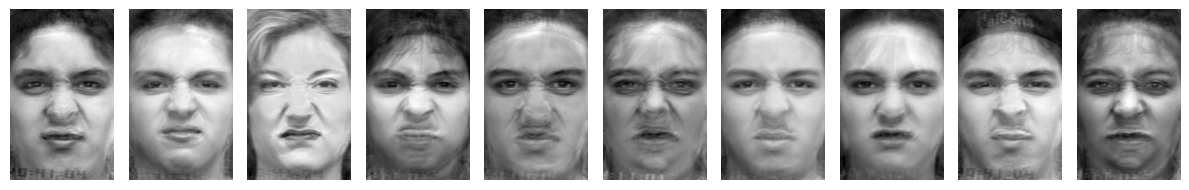

In [108]:
# Reconstruct in disgust mode
# calculate mean
mean_vector_disgust = np.mean(disgust_images_vector, axis=0)

pca = PCA(n_components=20)
pca.fit(disgust_images_vector)
eigen_vectors = pca.components_

# Apply PCA on 5 images
pca_image = np.matrix(flatten_random_image).dot(eigen_vectors.T)

# Reconstruct image
reconstruct_image = pca_image.dot(eigen_vectors) + mean_vector_disgust/ np.linalg.norm(np.mean(disgust_images_vector, axis=0), ord=2)

# Resahpe reconstruction vector to image(2D)
recon_images = []
for i in range(10):
    recon_vector = reconstruct_image[i, :]
    recon_image = recon_vector.reshape(330, 200)
    recon_images.append(recon_image)

# Create a figure with a 1x10 grid of subplots (10 subplots in total)
fig, axes = plt.subplots(1, 10, figsize=(12, 4))

# Display the top 10 reconstruction images using subplots
for i in range(10):
    # Convert reconstruction image to the correct range (0-255)
    recon_image = recon_images[i]
    recon_image = cv2.normalize(recon_image, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

    # Display reconstruction image in the current subplot
    axes[i].imshow(recon_image, cmap='gray')
    axes[i].axis('off')

# Adjust subplot spacing
plt.tight_layout()

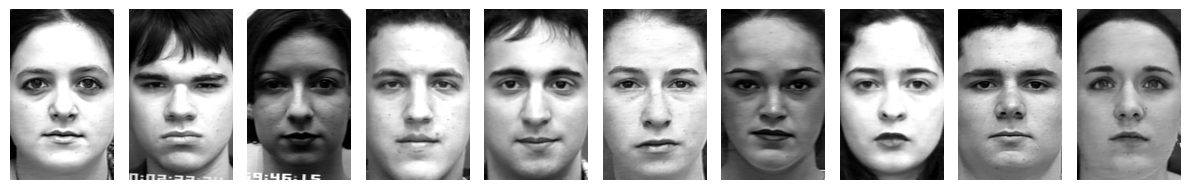

In [109]:
# Choose 10 images from neutral faces and convert to np.array
random_indices = random.sample(range(len(neutral_detected_faces)), 10)
random_images = []
flatten_random_image = []
for index in random_indices:
    img = neutral_detected_faces[index]
    random_images.append(img)
    vector = (img.flatten() - np.mean(surprise_images_vector, axis=0))/ np.linalg.norm(np.mean(surprise_images_vector, axis=0), ord=2)
    flatten_random_image.append(vector)

# Create a figure with a 2x5 grid of subplots (5 subplots in total)
fig, axes = plt.subplots(1, 10, figsize=(12, 4))

# Display the top 10 reconstruction images using subplots
for i in range(10):
    # Convert reconstruction image to the correct range (0-255)
    random_image = random_images[i]
    random_image = cv2.normalize(random_image, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

    # Display reconstruction image in the current subplot
    axes[i].imshow(random_image, cmap='gray')
    axes[i].axis('off')

# Adjust subplot spacing
plt.tight_layout()

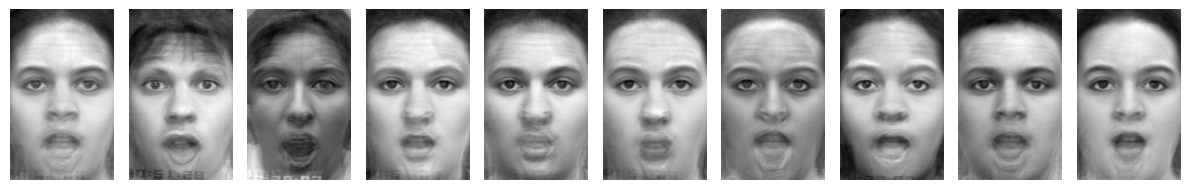

In [111]:
# Reconstruct in surprise mode
# calculate mean
mean_vector_surprise = np.mean(surprise_images_vector, axis=0)

pca = PCA(n_components=20)
pca.fit(surprise_images_vector)
eigen_vectors = pca.components_

# Apply PCA on 5 images
pca_image = np.matrix(flatten_random_image).dot(eigen_vectors.T)

# Reconstruct image
reconstruct_image = pca_image.dot(eigen_vectors) + mean_vector_surprise / np.linalg.norm(np.mean(surprise_images_vector, axis=0), ord=2)

# Resahpe reconstruction vector to image(2D)
recon_images = []
for i in range(10):
    recon_vector = reconstruct_image[i, :]
    recon_image = recon_vector.reshape(330, 200)
    recon_images.append(recon_image)

# Create a figure with a 1x10 grid of subplots (10 subplots in total)
fig, axes = plt.subplots(1, 10, figsize=(12, 4))

# Display the top 10 reconstruction images using subplots
for i in range(10):
    # Convert reconstruction image to the correct range (0-255)
    recon_image = recon_images[i]
    recon_image = cv2.normalize(recon_image, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

    # Display reconstruction image in the current subplot
    axes[i].imshow(recon_image, cmap='gray')
    axes[i].axis('off')

# Adjust subplot spacing
plt.tight_layout()

<span style="color: green;">
The identities of the people have been preserved to some extent.<br>
Yes, their feeling change as you see.<br>
According to observations, the eyes and eyebrows have been reconstructed better but the shape of the mouth is not very well reconstructed.
</span>